In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

In [ ]:
cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [ ]:
cur.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)",
    [
        ("Laptop", 2, 50000),
        ("Laptop", 1, 52000),
        ("Mouse", 5, 500),
        ("Keyboard", 3, 800),
        ("Monitor", 2, 7000),
    ]
)
conn.commit()


    product  total_qty   revenue
0  Keyboard          3    2400.0
1    Laptop          3  152000.0
2   Monitor          2   14000.0
3     Mouse          5    2500.0


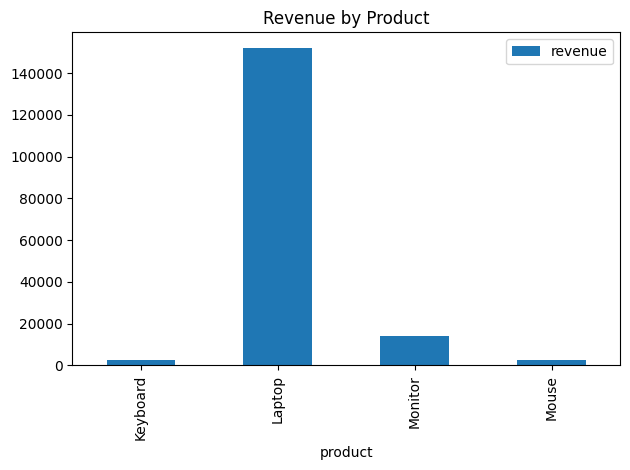

In [ ]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

print(df)

df.plot(kind="bar", x="product", y="revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()